In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data
from torch.utils.data import DataLoader 
from torchvision import transforms as T
from torchvision.utils import make_grid
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import math
import argparse
import datetime
from time import time

/state/partition1/job-63542623/ipykernel_2158520/3471491084.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Abins_w0 = torch.load("NS-res128-white-noise-noise-RK10.pt")


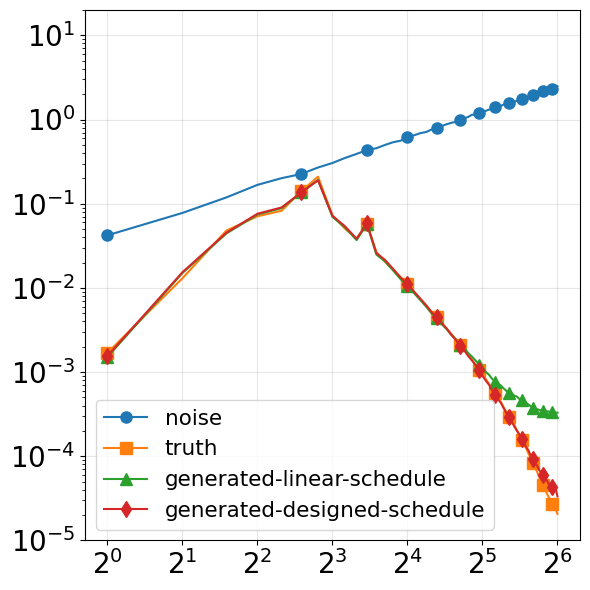

In [12]:
markers = ['o', 's', '^', 'd', 'v']

kvals = [k+1 for k in range(64)]
Abins_w0 = torch.load("NS-res128-white-noise-noise-RK10.pt")
Abins_w1 = torch.load("NS-res128-white-noise-truth-RK10.pt")
Abins_w2 = torch.load("NS-res128-white-noise-generated-RK10.pt")
Abins_w3 = torch.load("NS-res128-white-noise-generated-designed-schedule-RK10.pt") 


fig = plt.figure(figsize=(6,6))
plt.plot(kvals, Abins_w0,marker=markers[0], markersize=8, markevery=5, linestyle='-', label = 'noise')
plt.plot(kvals, Abins_w1, marker=markers[1], markersize=8, markevery=5, linestyle='-', label = 'truth')
plt.plot(kvals, Abins_w2, marker=markers[2], markersize=8, markevery=5, linestyle='-', label = 'generated-linear-schedule')
plt.plot(kvals, Abins_w3, marker=markers[3], markersize=8, markevery=5, linestyle='-', label = 'generated-designed-schedule')
plt.legend(fontsize=15.5, loc='lower left')
plt.grid(alpha=0.3)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size
plt.locator_params(axis='x', numticks=7)  # Adjust number as needed

plt.ylim(1e-5, 2*1e1)

plt.tight_layout()
plt.savefig(f"NSE-white-noise-RK10-compare-designed-schedule.pdf", dpi=300)

/state/partition1/job-63542623/ipykernel_2158520/1884272930.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Abins_w0 = torch.load("NS-res128-white-noise-noise-RK10.pt")


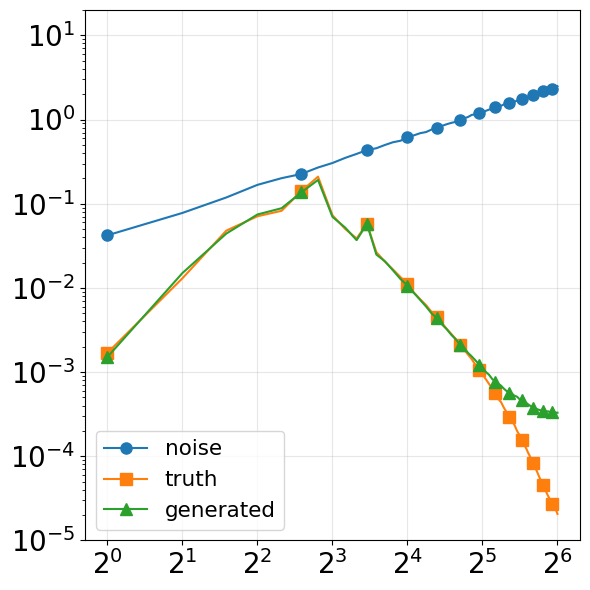

In [13]:
markers = ['o', 's', '^', 'd', 'v']

kvals = [k+1 for k in range(64)]
Abins_w0 = torch.load("NS-res128-white-noise-noise-RK10.pt")
Abins_w1 = torch.load("NS-res128-white-noise-truth-RK10.pt")
Abins_w2 = torch.load("NS-res128-white-noise-generated-RK10.pt")


fig = plt.figure(figsize=(6,6))
plt.plot(kvals, Abins_w0,marker=markers[0], markersize=8, markevery=5, linestyle='-', label = 'noise')
plt.plot(kvals, Abins_w1, marker=markers[1], markersize=8, markevery=5, linestyle='-', label = 'truth')
plt.plot(kvals, Abins_w2, marker=markers[2], markersize=8, markevery=5, linestyle='-', label = 'generated')
plt.legend(fontsize=15.5, loc='lower left')
plt.grid(alpha=0.3)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size
plt.locator_params(axis='x', numticks=7)  # Adjust number as needed

plt.ylim(1e-5, 2*1e1)

plt.tight_layout()
plt.savefig(f"NSE-white-noise-RK10.pdf", dpi=300)

/state/partition1/job-63542623/ipykernel_2158520/2799532663.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Abins_w0 = torch.load("NS-res128-spectrum-noise-noise-RK10.pt

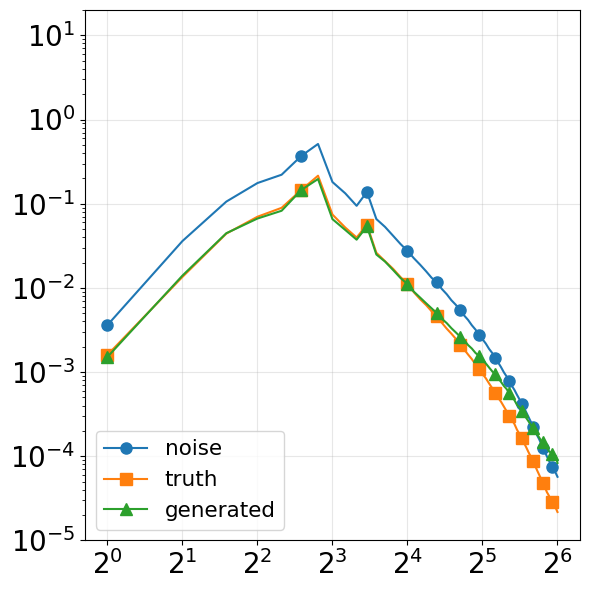

In [14]:
markers = ['o', 's', '^', 'd', 'v']

kvals = [k+1 for k in range(64)]
Abins_w0 = torch.load("NS-res128-spectrum-noise-noise-RK10.pt")
Abins_w1 = torch.load("NS-res128-spectrum-noise-truth-RK10.pt")
Abins_w2 = torch.load("NS-res128-spectrum-noisemulk-generated-RK10.pt")


fig = plt.figure(figsize=(6,6))
plt.plot(kvals, Abins_w0,marker=markers[0], markersize=8, markevery=5, linestyle='-', label = 'noise')
plt.plot(kvals, Abins_w1, marker=markers[1], markersize=8, markevery=5, linestyle='-', label = 'truth')
plt.plot(kvals, Abins_w2, marker=markers[2], markersize=8, markevery=5, linestyle='-', label = 'generated')
plt.legend(fontsize=15.5, loc='lower left')
plt.grid(alpha=0.3)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size
plt.locator_params(axis='x', numticks=7)  # Adjust number as needed

plt.ylim(1e-5, 2*1e1)

plt.tight_layout()
plt.savefig(f"NSE-spectrum-noise-RK10.pdf", dpi=300)

/state/partition1/job-63542623/ipykernel_2158520/1319857190.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Abins_w0 = torch.load("NS-res128-spectrum-noisemulk-noise-RK1

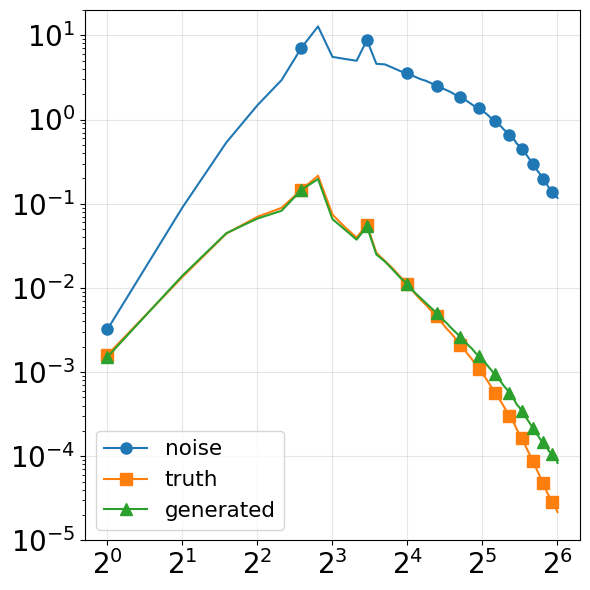

In [18]:
markers = ['o', 's', '^', 'd', 'v']

kvals = [k+1 for k in range(64)]
Abins_w0 = torch.load("NS-res128-spectrum-noisemulk-noise-RK10.pt")
Abins_w1 = torch.load("NS-res128-spectrum-noisemulk-truth-RK10.pt")
Abins_w2 = torch.load("NS-res128-spectrum-noisemulk-generated-RK10.pt")


fig = plt.figure(figsize=(6,6))
plt.plot(kvals, Abins_w0/2,marker=markers[0], markersize=8, markevery=5, linestyle='-', label = 'noise')
plt.plot(kvals, Abins_w1, marker=markers[1], markersize=8, markevery=5, linestyle='-', label = 'truth')
plt.plot(kvals, Abins_w2, marker=markers[2], markersize=8, markevery=5, linestyle='-', label = 'generated')
plt.legend(fontsize=15.5, loc='lower left')
plt.grid(alpha=0.3)
plt.xscale('log', base = 2)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=20)  # Change 14 to your desired size
plt.locator_params(axis='x', numticks=7)  # Adjust number as needed

plt.ylim(1e-5, 2*1e1)

plt.tight_layout()
plt.savefig(f"NSE-spectrum-noise-mulk-RK10.pdf", dpi=300)